In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
crimeDF = pd.read_csv("FBI_2013_Hate_Crime_Data.csv")

In [3]:
crimeDF.sample(n=5, random_state=1)

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population
258,California,Metropolitan Counties,Santa Cruz,1,0,1,1,0,0,0.0,2.0,0.0,1.0,0.0,NaN
984,New_Jersey,Cities,Brick Township,2,1,0,1,0,0,0.0,1.0,2.0,1.0,0.0,"75,371"
922,Missouri,Cities,Raytown,1,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,"29,501"
351,Connecticut,Cities,Plainville,0,0,1,0,0,0,0.0,NaN,NaN,NaN,1.0,"17,850"
231,California,Universities and Colleges,California State Polytechnic University: San L...,0,0,1,0,0,0,0.0,1.0,0.0,0.0,0.0,"18,679"


We can see Metropolitan Counties and Nonmetropolitan Counties has NaN in their Population column.

In [4]:
crimeDF.loc[crimeDF['Agency type']==('Metropolitan Counties')].sample(n=5, random_state=1)

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population
616,Louisiana,Metropolitan Counties,Calcasieu,0,4,3,0,0,0,0.0,4.0,1.0,1.0,1.0,NaN
315,Colorado,Metropolitan Counties,Pueblo,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,NaN
316,Colorado,Metropolitan Counties,Weld,1,0,1,0,0,0,0.0,1.0,0.0,1.0,0.0,NaN
503,Iowa,Metropolitan Counties,Mills,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,NaN
860,Michigan,Metropolitan Counties,Oakland,7,2,5,3,0,0,0.0,5.0,4.0,5.0,3.0,NaN


In [5]:
crimeDF.loc[crimeDF['Agency type']==('Nonmetropolitan Counties')].sample(n=5, random_state=1).sample(n=5, random_state=1)

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population
534,Kansas,Nonmetropolitan Counties,Greenwood,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,NaN
1636,Utah,Nonmetropolitan Counties,Carbon,3,0,0,0,0,0,0.0,1.0,0.0,2.0,0.0,NaN
913,Minnesota,Nonmetropolitan Counties,Rice,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,NaN
1802,West_Virginia,Nonmetropolitan Counties,Harrison,1,1,2,0,0,0,0.0,0.0,0.0,2.0,2.0,NaN
1824,Wisconsin,Nonmetropolitan Counties,Oneida,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,NaN


We will fill the NaN value in the crimeDF with information we got from another file contains population for counties.

In [6]:
countyDF = pd.read_csv("county_population.csv")

we can see the 'link' column is not cleaned, we only want to keep the county name.

In [7]:
countyDF.sample(n=5, random_state=1)

,link,State,pop2016,pop2010,GrowthRate
80,"{""type"":""a"",""key"":null,""ref"":null,""props"":{""hr...",Massachusetts,785205,745422,0.053370
84,"{""type"":""a"",""key"":null,""ref"":null,""props"":{""hr...",Georgia,755754,689595,0.095939
33,"{""type"":""a"",""key"":null,""ref"":null,""props"":{""hr...",Ohio,1248514,1278200,-0.023225
81,"{""type"":""a"",""key"":null,""ref"":null,""props"":{""hr...",California,771410,719899,0.071553
93,"{""type"":""a"",""key"":null,""ref"":null,""props"":{""hr...",Missouri,698895,674804,0.035701


Clean the link column and store the result in a listed called link_clean.

In [8]:
whitelist = set('abcdefghijklmnopqrstuvwxyz ABCDEFGHIJKLMNOPQRSTUVWXYZ')

In [9]:
clean_link= []
for element in countyDF['link']:
    element = element.split(",")[4].split(':')[1]
    element = ''.join(filter(whitelist.__contains__, element))
    clean_link.append(element)

In [10]:
countyDF['clean_link'] = clean_link

In [11]:
countyDF.sample(n=5, random_state=1)

,link,State,pop2016,pop2010,GrowthRate,clean_link
80,"{""type"":""a"",""key"":null,""ref"":null,""props"":{""hr...",Massachusetts,785205,745422,0.053370,Essex County
84,"{""type"":""a"",""key"":null,""ref"":null,""props"":{""hr...",Georgia,755754,689595,0.095939,Cobb County
33,"{""type"":""a"",""key"":null,""ref"":null,""props"":{""hr...",Ohio,1248514,1278200,-0.023225,Cuyahoga County
81,"{""type"":""a"",""key"":null,""ref"":null,""props"":{""hr...",California,771410,719899,0.071553,San Mateo County
93,"{""type"":""a"",""key"":null,""ref"":null,""props"":{""hr...",Missouri,698895,674804,0.035701,Jackson County


Because our crime records is in 2013, so we will generate the population of each county in 2013 with their population in 2010 and the growth rate of their population.

In [12]:
pop2013 = []
for index, row in countyDF.iterrows():
    result = row['pop2010']*(1 + float(row['GrowthRate']))**3
    pop2013.append(int(result))

In [13]:
countyDF['pop2013'] = pop2013

In [14]:
countyDF.sample(n=5, random_state=1)

,link,State,pop2016,pop2010,GrowthRate,clean_link,pop2013
80,"{""type"":""a"",""key"":null,""ref"":null,""props"":{""hr...",Massachusetts,785205,745422,0.053370,Essex County,871253
84,"{""type"":""a"",""key"":null,""ref"":null,""props"":{""hr...",Georgia,755754,689595,0.095939,Cobb County,907722
33,"{""type"":""a"",""key"":null,""ref"":null,""props"":{""hr...",Ohio,1248514,1278200,-0.023225,Cuyahoga County,1191194
81,"{""type"":""a"",""key"":null,""ref"":null,""props"":{""hr...",California,771410,719899,0.071553,San Mateo County,885753
93,"{""type"":""a"",""key"":null,""ref"":null,""props"":{""hr...",Missouri,698895,674804,0.035701,Jackson County,749687


We only need to keep the columns clean_link and pop2013.

In [15]:
countyDF = countyDF[['clean_link','pop2013']]

In [16]:
countyDF.sample(n=5, random_state=1)

,clean_link,pop2013
80,Essex County,871253
84,Cobb County,907722
33,Cuyahoga County,1191194
81,San Mateo County,885753
93,Jackson County,749687


Fill the NaN in population column in crimeDf with countyDF.

In [17]:
d = {}
for index, row in countyDF.iterrows():
    d[row['clean_link'].rsplit(' ', 1)[0]] = row['pop2013']

In [18]:
for index, row in crimeDF.iterrows():
    if type(row['Population']) is str:
        crimeDF.at[index, 'Population'] = row['Population'].replace(',', '')
    if row['Agency name'] in d and type(row['Population']) is float:
        crimeDF.at[index, 'Population'] = d[row['Agency name']]

There are still some nan values in the poplation column for thoes counties that are not in our county file. For this project we will only keep the rows that doesn't have NaN in the population column.

In [19]:
for element in crimeDF:
    if type(element) is str:
        element= element.replace(',', '')
crimeDF['Population'] = crimeDF['Population'].astype(float)
crimeDF = crimeDF[np.isfinite(crimeDF['Population'])]

In [20]:
crimeDF['Population'].isna().sum()

0

There are also NaN values in other columns in the crimeDF. But from observe the dataframe, we find out these NaN values is just when the number of crime is 0(I guess sometimes they decide to leave the cell empty if no crime is reported). So we can just fill these NaNs with 0.

In [21]:
crimeDF.isna().sum()

State                  0
Agency type            0
Agency name            0
Race                   0
Religion               0
Sexual orientation     0
Ethnicity              0
Disability             0
Gender                 1
Gender Identity        1
1st quarter           25
2nd quarter           28
3rd quarter           17
4th quarter           36
Population             0
dtype: int64

In [22]:
crimeDF = crimeDF.fillna(0)

In [23]:
crimeDF.isna().sum()

State                 0
Agency type           0
Agency name           0
Race                  0
Religion              0
Sexual orientation    0
Ethnicity             0
Disability            0
Gender                0
Gender Identity       0
1st quarter           0
2nd quarter           0
3rd quarter           0
4th quarter           0
Population            0
dtype: int64

Visuallization

In [24]:
crimeDF.head(10)

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population
0,Alabama,Cities,Florence,2,0,0,0,0,0,0.0,0.0,1.0,0.0,1.0,39481.0
1,Alabama,Cities,Hoover,0,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,84139.0
2,Alabama,Cities,Prattville,2,0,0,0,0,0,0.0,1.0,0.0,1.0,0.0,35154.0
3,Alabama,Cities,Tuscaloosa,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,94126.0
4,Alaska,Cities,Anchorage,8,0,0,0,0,0,0.0,2.0,3.0,3.0,0.0,299455.0
5,Arizona,Cities,Apache Junction,1,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,36626.0
6,Arizona,Cities,Avondale,4,0,0,1,0,0,0.0,1.0,1.0,3.0,0.0,78905.0
7,Arizona,Cities,Eagar,0,0,0,1,0,0,0.0,0.0,1.0,0.0,0.0,5034.0
8,Arizona,Cities,El Mirage,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,32837.0
9,Arizona,Cities,Gilbert,1,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,225232.0


Check the types of each column, convert Race, Religion, Sexual, Ethnicity, Disability, Gender and Gender Identity to int.

In [25]:
crimeDF.dtypes

State                  object
Agency type            object
Agency name            object
Race                    int64
Religion                int64
Sexual orientation      int64
Ethnicity               int64
Disability              int64
Gender                 object
Gender Identity       float64
1st quarter           float64
2nd quarter           float64
3rd quarter           float64
4th quarter           float64
Population            float64
dtype: object

In [26]:
crimeDF=crimeDF.replace(r'^\s*$', np.nan, regex=True)
crimeDF.isna().sum()

State                 0
Agency type           0
Agency name           0
Race                  0
Religion              0
Sexual orientation    0
Ethnicity             0
Disability            0
Gender                1
Gender Identity       0
1st quarter           0
2nd quarter           0
3rd quarter           0
4th quarter           0
Population            0
dtype: int64

In [27]:
crimeDF['Gender Identity']=crimeDF['Gender Identity'].astype(int)
crimeDF['Gender']=crimeDF['Gender'].fillna(0)
crimeDF['Gender']=crimeDF['Gender'].astype(int)


Add a new column named Total that sum all crimes in each row.

In [28]:
crimeDF['Total']=None
for i in range(len(crimeDF)):
    crimeDF['Total'].iloc[i]=crimeDF['Race'].iloc[i] + crimeDF['Gender'].iloc[i] + crimeDF['Religion'].iloc[i] + crimeDF['Sexual orientation'].iloc[i] + crimeDF['Ethnicity'].iloc[i] + crimeDF['Disability'].iloc[i] + crimeDF['Gender Identity'].iloc[i]
    

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [29]:
crimeDF

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population,Total
0,Alabama,Cities,Florence,2,0,0,0,0,0,0,0.0,1.0,0.0,1.0,39481.0,2
1,Alabama,Cities,Hoover,0,0,1,0,0,0,0,0.0,1.0,0.0,0.0,84139.0,1
2,Alabama,Cities,Prattville,2,0,0,0,0,0,0,1.0,0.0,1.0,0.0,35154.0,2
3,Alabama,Cities,Tuscaloosa,1,0,0,0,0,0,0,0.0,0.0,1.0,0.0,94126.0,1
4,Alaska,Cities,Anchorage,8,0,0,0,0,0,0,2.0,3.0,3.0,0.0,299455.0,8
5,Arizona,Cities,Apache Junction,1,0,0,0,0,0,0,1.0,0.0,0.0,0.0,36626.0,1
6,Arizona,Cities,Avondale,4,0,0,1,0,0,0,1.0,1.0,3.0,0.0,78905.0,5
7,Arizona,Cities,Eagar,0,0,0,1,0,0,0,0.0,1.0,0.0,0.0,5034.0,1
8,Arizona,Cities,El Mirage,1,0,0,0,0,0,0,0.0,0.0,1.0,0.0,32837.0,1
9,Arizona,Cities,Gilbert,1,0,0,0,0,0,0,1.0,0.0,0.0,0.0,225232.0,1


To find the relationship between populatin and total crimes. The plot shows that there is no positive relationship between them.

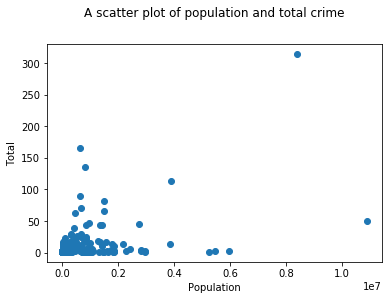

In [65]:
plt.scatter(crimeDF.Population, crimeDF.Total)
plt.xlabel("Population")
plt.ylabel("Total")
plt.title("A scatter plot of population and total crime", y=1.1)
plt.show()

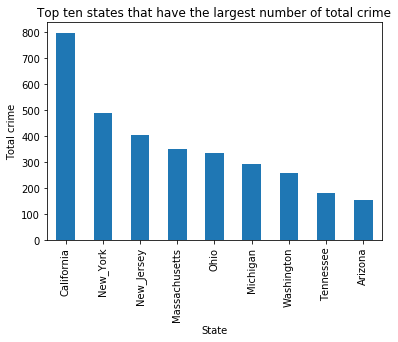

In [69]:
statesum=crimeDF.groupby('State').sum()
statesum.sort_values("Total", inplace=True, ascending=False)
topten=statesum.iloc[0:9]
topten['Total'].plot.bar()
plt.ylabel("Total crime")
plt.title("Top ten states that have the largest number of total crime")
plt.show()